<a href="https://colab.research.google.com/github/M-Pascal/Breast_Cancer_Diagnosis/blob/main/Summative_Intro_to_ml_%5BPascal_Mugisha%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [149]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# All necessary libraries for training model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras.callbacks import EarlyStopping

In [150]:
# Getting dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# The Dataset
> ***Brief Description:***
**Problem Statement:**  
Early breast cancer detection is hindered by inaccurate screenings, especially for dense breast tissue, and limited healthcare access in Rwanda. A smarter, reliable tool is needed to improve accuracy and make screening accessible for all.

This dataset contains breast cancer diagnostic data, with features derived from tumor cell characteristics of differnt features in the dataset. The diagnosis column indicates whether a tumor is malignant (M) or benign (B). The dataset can be used to train machine learning models for early breast cancer detection, addressing issues of accuracy and accessibility in Rwanda.

>>**Click link to access Dataset:** https://www.kaggle.com/code/mohamedarsathb/breast-cancer-classification-90-accuracy/input

In [151]:
#TO DO: Load Data (Separate into: Train, Validation and test sets)

In [152]:
path = '/content/drive/MyDrive/Y3_T1/SUMMATIVE/dataset/data.csv'
df = pd.read_csv(path)

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [153]:
# Dropping feature that are not usefull to the model
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [154]:
#  Checking for any missing values in the features
print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
df.isnull().sum()


Basic Statistics:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [155]:
# Converting columns of diagnosis into binary Benign(B=0) or Malignant(M=1)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

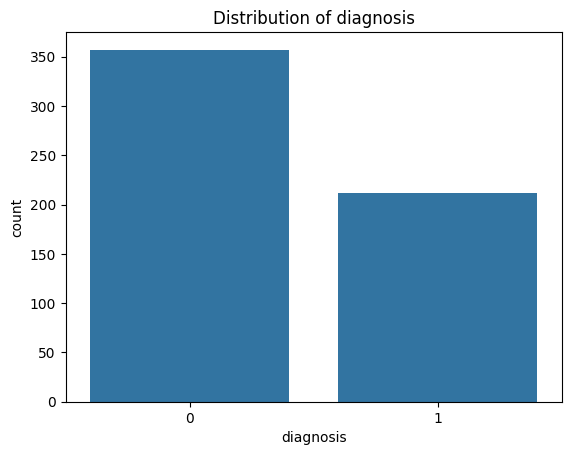

<Figure size 800x600 with 0 Axes>

In [156]:
# Displaying the distribution graph target variable
sns.countplot(x='diagnosis', data=df)
plt.title("Distribution of diagnosis")
plt.figure(figsize=(8, 6))
plt.show()

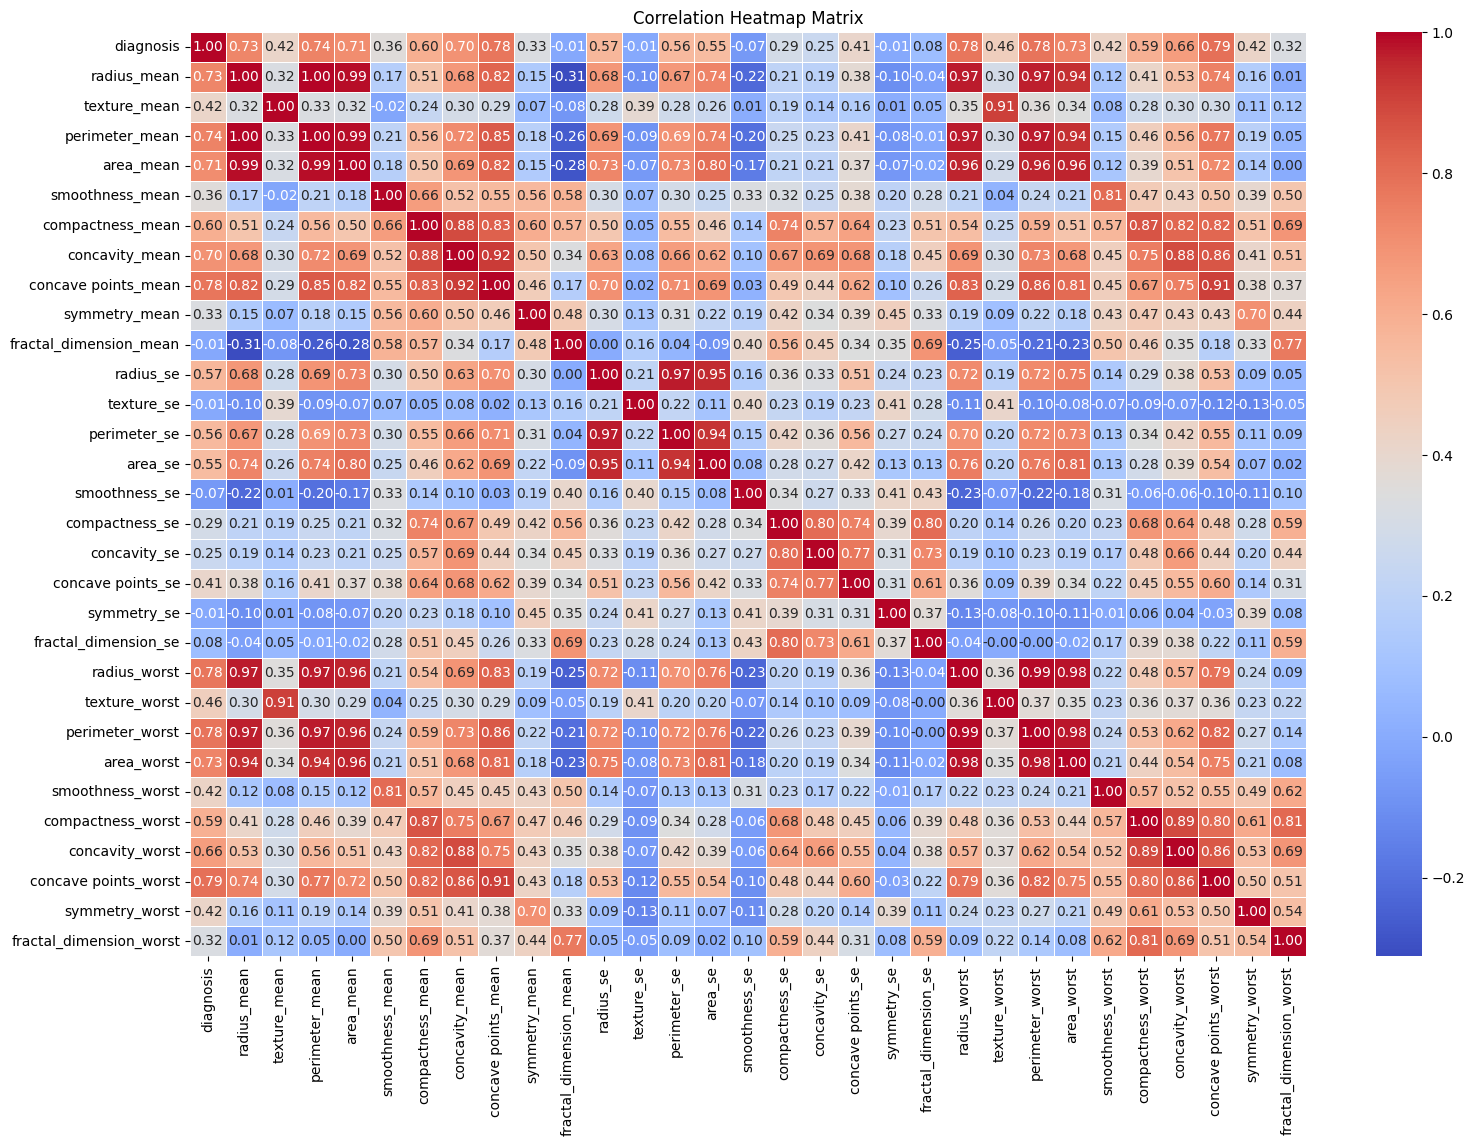

In [157]:
# Correlation matrix of all features
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Matrix')
plt.show()

In [158]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [159]:
#Splitting the dataset into target and features
target = "diagnosis"
X = df.drop(target, axis=1)
y = df[target]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (569, 30)
Shape of y: (569,)


In [160]:
# Standardsiding the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [161]:
# Split dataset (80% train, 10% validation, 10% test)
# First: split into 80% training and 20% (temporary set for validation & test in equal share)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Second: Split the 20% temporary set into 10% validation and 10% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset shape
print(f"Training data: {X_train.shape}")
print(f"Validation data: {X_val.shape}")
print(f"Testing data: {X_test.shape}")

Training data: (455, 30)
Validation data: (57, 30)
Testing data: (57, 30)


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> 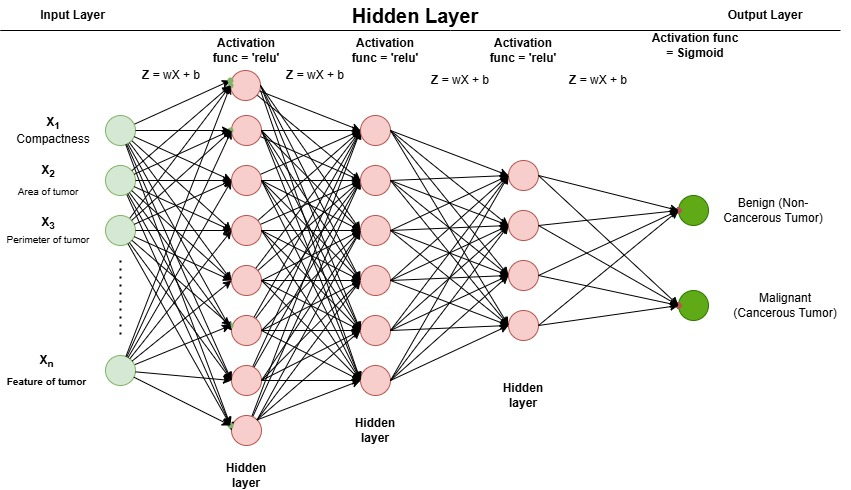




In [162]:
# Define logistic regression model with hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # Regularization strength
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Logistic regression model
model_log_reg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(model_log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

In [163]:
# Making Predictions on validation set
y_val_pred = best_model.predict(X_val)

# Model evaluation
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n {classification_report(y_val, y_val_pred)}")

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy: 0.9825
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.96      0.98        27

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



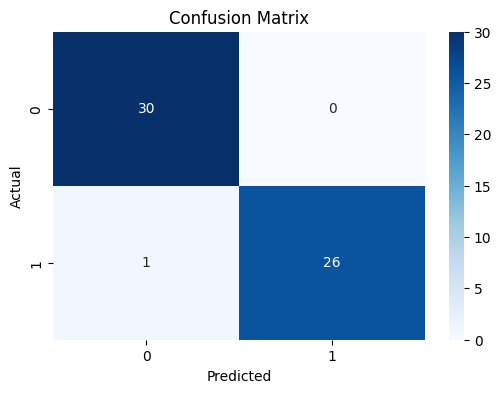

In [164]:
# Plotting confusion matrix for logistic regression
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Task: Define a function that creates models without and With specified Optimization techniques


# Model without any Optimization Techniques

In [165]:
def Creating_model(X_train, y_train, X_val, y_val):
  # Model architecture
  model = Sequential([
      Input(shape=(X_train.shape[1],)), # Input layer
      Dense(64, activation='relu'), # Hidden Layer_1
      Dense(32, activation='relu'), # Hidden Layer_2
      Dense(16, activation='relu'), # Hidden Layer_3
      Dense(1, activation='sigmoid')
  ])

  # Compile the model without optimizer specifications
  model.compile(loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model without specifying epochs or early stopping
  history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32)

  return model, history

# calling function
model, history = Creating_model(X_train, y_train, X_val, y_val)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6903 - loss: 0.6048 - val_accuracy: 0.9123 - val_loss: 0.3828


In [166]:
# model summary
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_91 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,220 (36.02 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,611 (18.02 KB)

# Model with any Optimization Techniques

In [167]:
# Model with different optimization technique
def define_model(optimizer, hidden_layers, regularization,
                 reg_value, early_stopping, dropout,
                 learning_rate,epochs):
    """
    Defines, compiles, and trains a model with customizable hyperparameters, and layers.
    """

    # Choose regularizer based on input
    if regularization == "l1":
        regularizer = l1(reg_value)
    elif regularization == "l2":
        regularizer = l2(reg_value)
    elif regularization == "l1_l2":
        regularizer = l1_l2(reg_value)
    else:
        regularizer = None

    # Define the model architecture
    model_1 = Sequential()
    model_1.add(Input(shape=(X_train.shape[1],)))  # Input layer

    # Dynamically hidden layers
    for layer in hidden_layers:
        model_1.add(Dense(layer, activation='relu', kernel_regularizer=regularizer))
        model_1.add(Dropout(dropout))

    # Output layer
    model_1.add(Dense(1, activation='sigmoid'))  # For binary classification

    # Optimizer with learning rate selection based on the dictionary
    optimizers_dict = {
        "Adam": Adam(learning_rate=learning_rate),
        "SGD": SGD(learning_rate=learning_rate, momentum=0.9),
        "RMSprop": RMSprop(learning_rate=learning_rate),
        "Adagrad": Adagrad(learning_rate=learning_rate)
    }

    if optimizer not in optimizers_dict:
        raise ValueError(f"Invalid optimizer '{optimizer}'. Plz Add it on the {list(optimizers_dict.keys())}")

    # Compile the model with the optimizer instance
    model_1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Define callbacks
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', verbose=1, patience=5))

    # Train the model
    history_1 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=epochs, batch_size=32, callbacks=callbacks)

    return model_1, history_1

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [168]:
# Plotting loss curve of the model
def loss_curve_plot(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [169]:
# Function that evaluate model function
def evaluate_model(model, X_test, y_test):

    # Making prediction
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nClassification Report:\n {classification_report(y_test, y_pred)}")
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return y_pred # Return y_pred to be used in confusion matrix

In [170]:
# plotting confusion matrix function
def plot_confusion_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluation metric from model without any Optimization Technique

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.94      0.94      0.94        16

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57


Accuracy: 0.9649
Precision: 0.9375
Recall: 0.9375
F1 Score: 0.9375


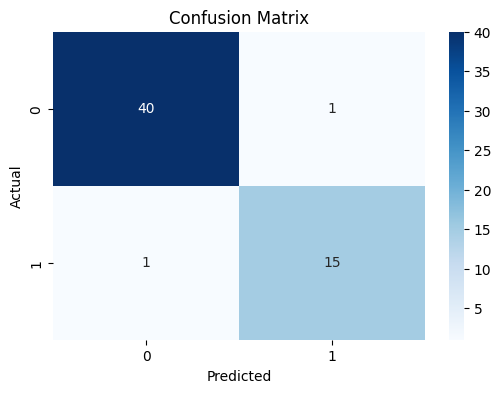

In [171]:
# Call evaluation function and get predictions
y_pred = evaluate_model(model, X_test, y_test)

# Call function to plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

# Instance model 2

In [172]:
#TODO:
model_2, history_2 = define_model(optimizer="Adam",
                                  hidden_layers=[64, 32, 16],
                                  regularization="l2",
                                  reg_value=0.01,
                                  early_stopping=True,
                                  dropout=0.3,
                                  learning_rate=0.001,
                                  epochs=50)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5318 - loss: 1.7256 - val_accuracy: 0.8772 - val_loss: 1.5191
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7340 - loss: 1.5502 - val_accuracy: 0.9474 - val_loss: 1.3674
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8465 - loss: 1.3712 - val_accuracy: 0.9298 - val_loss: 1.2071
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8834 - loss: 1.2269 - val_accuracy: 0.9298 - val_loss: 1.0601
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9066 - loss: 1.1043 - val_accuracy: 0.9474 - val_loss: 0.9509
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9360 - loss: 0.9671 - val_accuracy: 0.9474 - val_loss: 0.8682
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9622 - loss: 0.8943 - val_accuracy: 0.9474 - val_loss: 0.8045
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9467 - loss: 0.8436 - val_accuracy: 0.9474 - v

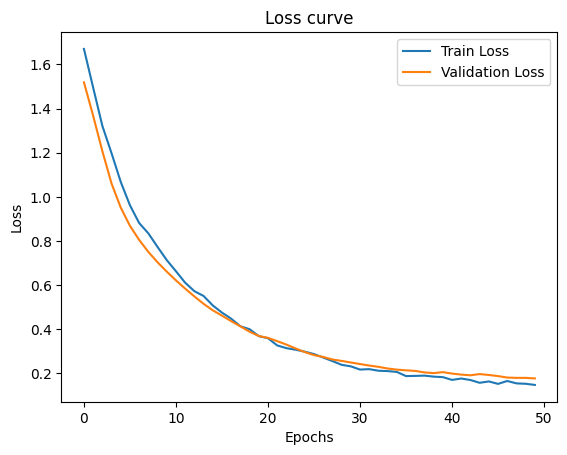

In [173]:
# Loss curve of model 2
loss_curve_plot(history_2)

In [174]:
# Model summary
model_2.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_95 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,829 (54.02 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,220 (36.02 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.94      1.00      0.97        16

    accuracy                           0.98        57
   macro avg       0.97      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57


Accuracy: 0.9825
Precision: 0.9412
Recall: 1.0000
F1 Score: 0.9697


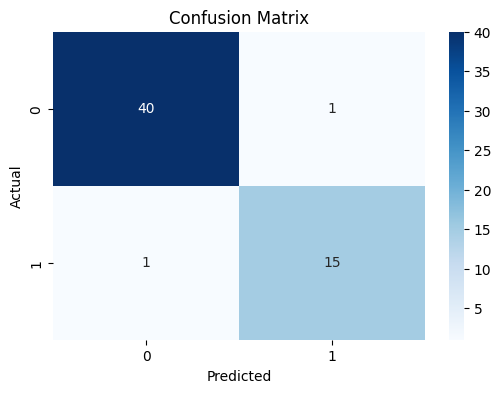

In [175]:
#print confusion matrix and error analysis metrics after loss evaluation
evaluate_model(model_2, X_test, y_test)

plot_confusion_matrix(y_test, y_pred)

# Instance model 3

In [176]:
#TODO:
model_3, history_3 = define_model(optimizer="SGD",
                                  hidden_layers=[64, 32, 16],
                                  regularization="l2",
                                  reg_value=0.0001,
                                  early_stopping=True,
                                  dropout=0.3,
                                  learning_rate=0.01,
                                  epochs=70)
#print out confusion matrix and error analysis metrics after the cell

Epoch 1/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5568 - loss: 0.7784 - val_accuracy: 0.5088 - val_loss: 0.6645
Epoch 2/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5328 - loss: 0.7049 - val_accuracy: 0.6491 - val_loss: 0.6027
Epoch 3/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6331 - loss: 0.6413 - val_accuracy: 0.8772 - val_loss: 0.5646
Epoch 4/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6799 - loss: 0.6253 - val_accuracy: 0.9298 - val_loss: 0.5290
Epoch 5/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8014 - loss: 0.5358 - val_accuracy: 0.9298 - val_loss: 0.4968
Epoch 6/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8205 - loss: 0.5099 - val_accuracy: 0.9298 - val_loss: 0.4685
Epoch 7/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7946 - loss: 0.4966 - val_accuracy: 0.9123 - val_loss: 0.4400
Epoch 8/70
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8825 - loss: 0.4406 - val_accuracy: 0.9123 - val_loss

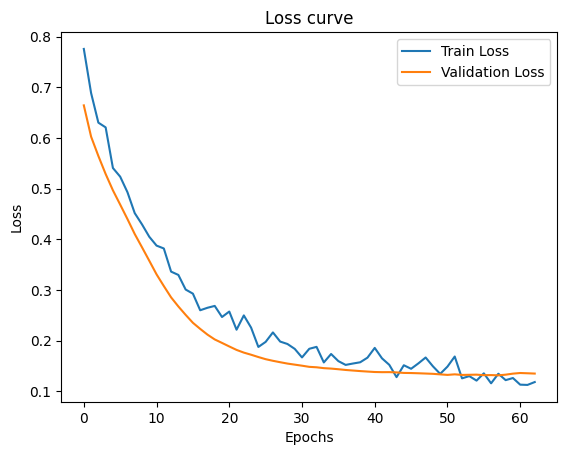

In [177]:
# Loss curve for model 3
loss_curve_plot(history_3)

In [178]:
# Model 3 summary
model_3.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,611 (18.02 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.94      1.00      0.97        16

    accuracy                           0.98        57
   macro avg       0.97      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57


Accuracy: 0.9825
Precision: 0.9412
Recall: 1.0000
F1 Score: 0.9697


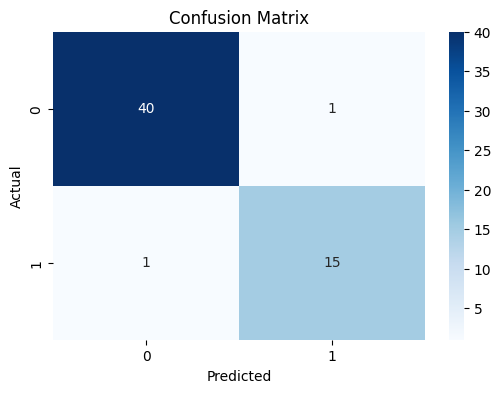

In [179]:
#print confusion matrix and error analysis metrics after loss evaluation
evaluate_model(model_3, X_test, y_test)

plot_confusion_matrix(y_test, y_pred)

# Instance model 4

In [180]:
#TODO:
model_4, history_4 = define_model(optimizer="RMSprop",
                                  hidden_layers=[128, 64, 32, 16],
                                  regularization="l1",
                                  reg_value=0.0005,
                                  early_stopping=True,
                                  dropout=0.2,
                                  learning_rate=0.00001,
                                  epochs=100)
#print out confusion matrix and error analysis metrics after the cell

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7285 - loss: 1.3000 - val_accuracy: 0.9474 - val_loss: 0.9203
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9328 - loss: 0.9305 - val_accuracy: 0.9474 - val_loss: 0.8290
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9701 - loss: 0.8129 - val_accuracy: 0.9474 - val_loss: 0.7875
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9716 - loss: 0.7659 - val_accuracy: 0.9474 - val_loss: 0.7567
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9661 - loss: 0.7504 - val_accuracy: 0.9474 - val_loss: 0.7406
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9797 - loss: 0.6939 - val_accuracy: 0.9474 - val_loss: 0.7158
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9846 - loss: 0.6495 - val_accuracy: 0.9474 - val_loss: 0.6751
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9843 - loss: 0.6510 - val_accuracy: 0.9649 -

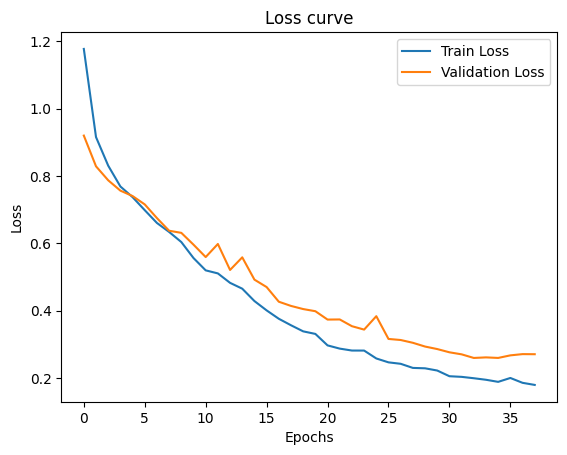

In [181]:
loss_curve_plot(history_4)

In [182]:
# Model summary
model_4.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_103 (Dense)                    │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_70 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,700 (116.02 KB)

 Trainable params: 14,849 (58.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,851 (58.02 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.94      1.00      0.97        16

    accuracy                           0.98        57
   macro avg       0.97      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57


Accuracy: 0.9825
Precision: 0.9412
Recall: 1.0000
F1 Score: 0.9697


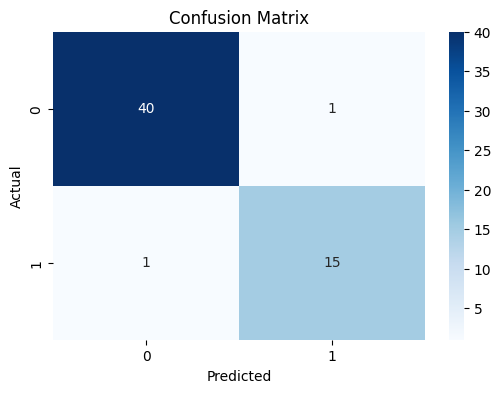

In [183]:
# Print confusion matrix and error analysis metrics after loss evaluation
evaluate_model(model_4, X_test, y_test)

plot_confusion_matrix(y_test, y_pred)

# Instance model 5

In [184]:
#TODO:
model_5, history_5 = define_model(optimizer="Adagrad",
                                  hidden_layers=[128, 64, 32, 16],
                                  regularization="l1_l2",
                                  reg_value=0.002,
                                  early_stopping=True,
                                  dropout=0.3,
                                  learning_rate=0.0001,
                                  epochs=150)
#print out confusion matrix and error analysis metrics after the cell

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5258 - loss: 3.6562 - val_accuracy: 0.4737 - val_loss: 3.6420
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5395 - loss: 3.6299 - val_accuracy: 0.4912 - val_loss: 3.6215
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5156 - loss: 3.6269 - val_accuracy: 0.5263 - val_loss: 3.6019
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5451 - loss: 3.6444 - val_accuracy: 0.5789 - val_loss: 3.5842
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5733 - loss: 3.5980 - val_accuracy: 0.5965 - val_loss: 3.5708
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6175 - loss: 3.5742 - val_accuracy: 0.6140 - val_loss: 3.5575
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5747 - loss: 3.5888 - val_accuracy: 0.6491 - val_loss: 3.5449
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5797 - loss: 3.5799 - val_accuracy: 0.7193 - 

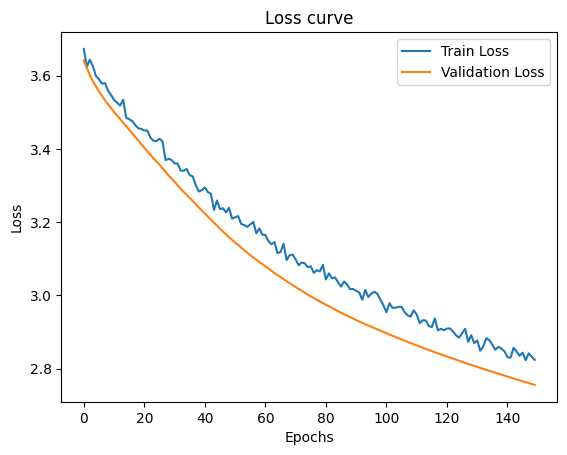

In [185]:
loss_curve_plot(history_5)

In [186]:
# Model 5 summary
model_5.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)                    │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_71 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_72 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_73 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_74 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,700 (116.02 KB)

 Trainable params: 14,849 (58.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,851 (58.02 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        16

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


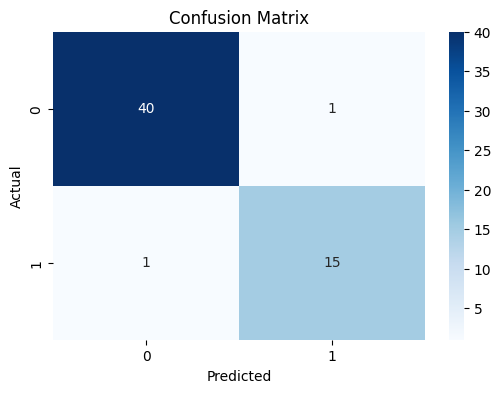

In [187]:
# Print confusion matrix and error analysis metrics after loss evaluation
evaluate_model(model_5, X_test, y_test)

plot_confusion_matrix(y_test, y_pred)

# Saving Models

Saving all the model in single directory called ```'save_models'```

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [188]:
# Saving all the models within directory
import os
import pickle

def save_model(model, filename, directory='saved_models'):
    """
    Save the model to a specified directory.
    """

    # Create the directory if it doesn't exist
    os.makedirs(directory, exist_ok=True)

    # file path
    file_path = os.path.join(directory, filename)

    # Save the model to a file.
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filename}")

save_model(model, 'model_1(Logistic_regression).pkl')
save_model(model_2, 'model_2(Adam).keras')
save_model(model_3, 'model_3(SGD).keras')
save_model(model_4, 'model_4(RMSprop).keras')
save_model(model_5, 'model_5(Adagrad).keras')

Model saved to model_1(Logistic_regression).pkl
Model saved to model_2(Adam).keras
Model saved to model_3(SGD).keras
Model saved to model_4(RMSprop).keras
Model saved to model_5(Adagrad).keras


## -----------------------The end-----------------------

Congratulations!!
